# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [16]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
#image_path = '...'
#image_path = '/Users/stefania/Desktop/Teaching/NAML/LAB_passaggio-consegna/data/TarantulaNebula.jpg'
image_path = '/content/drive/MyDrive/Colab Notebooks/NAML/LABS/LAB01/TarantulaNebula.jpg'
#image_path = 'drive/My Drive/polimi/NAML/LAB/data/mondrian.jpg'
#image_path = 'drive/My Drive/polimi/NAML/LAB/data/misterious_person.jpg'

A = imread(image_path)

In [17]:
A.shape

(567, 630, 3)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

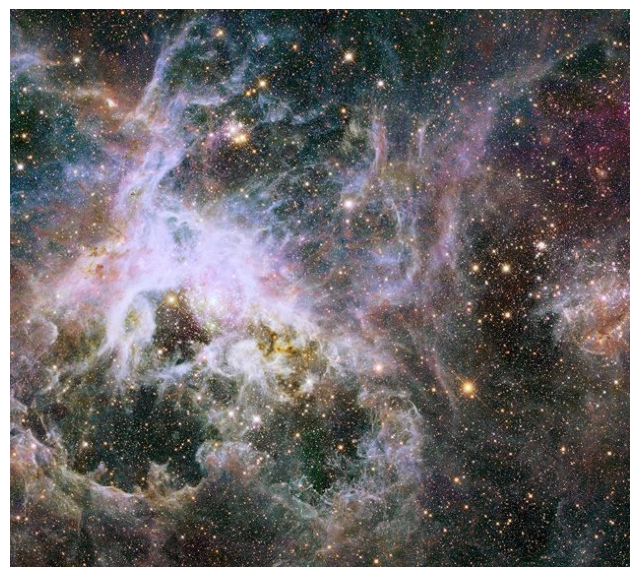

In [18]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

In [20]:
X = np.mean(A, axis=2)

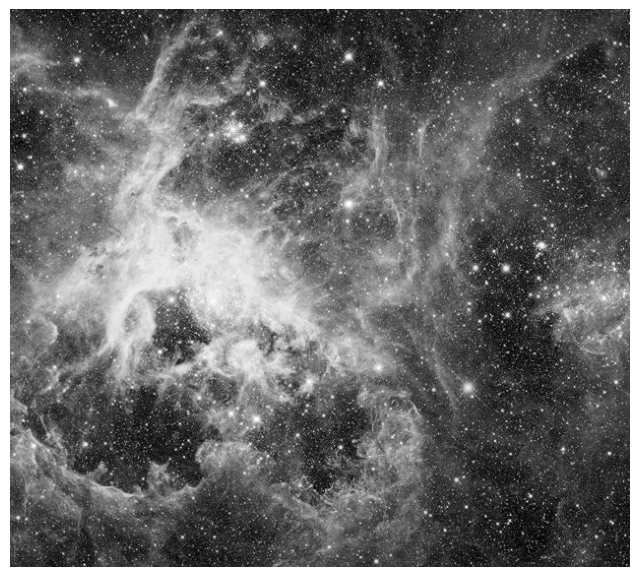

In [21]:
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

What is the picture size?

In [ ]:
X.shape

(567, 630)

Perform the SVD decomposition

In [22]:
U, s, VT = np.linalg.svd(X, full_matrices = False)

U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

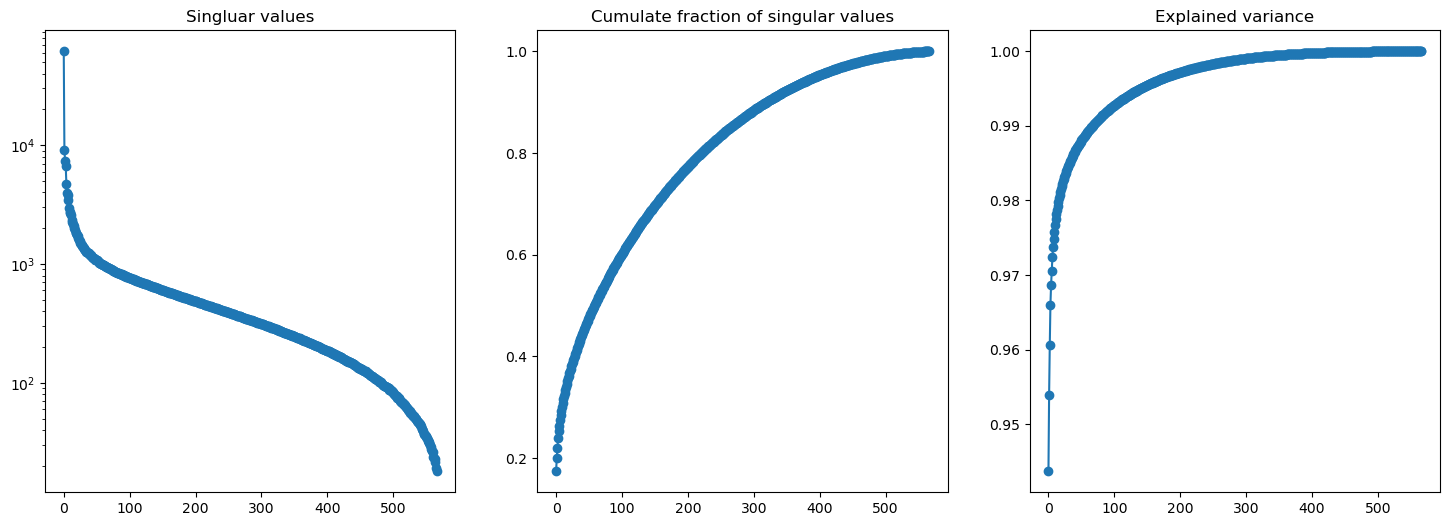

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

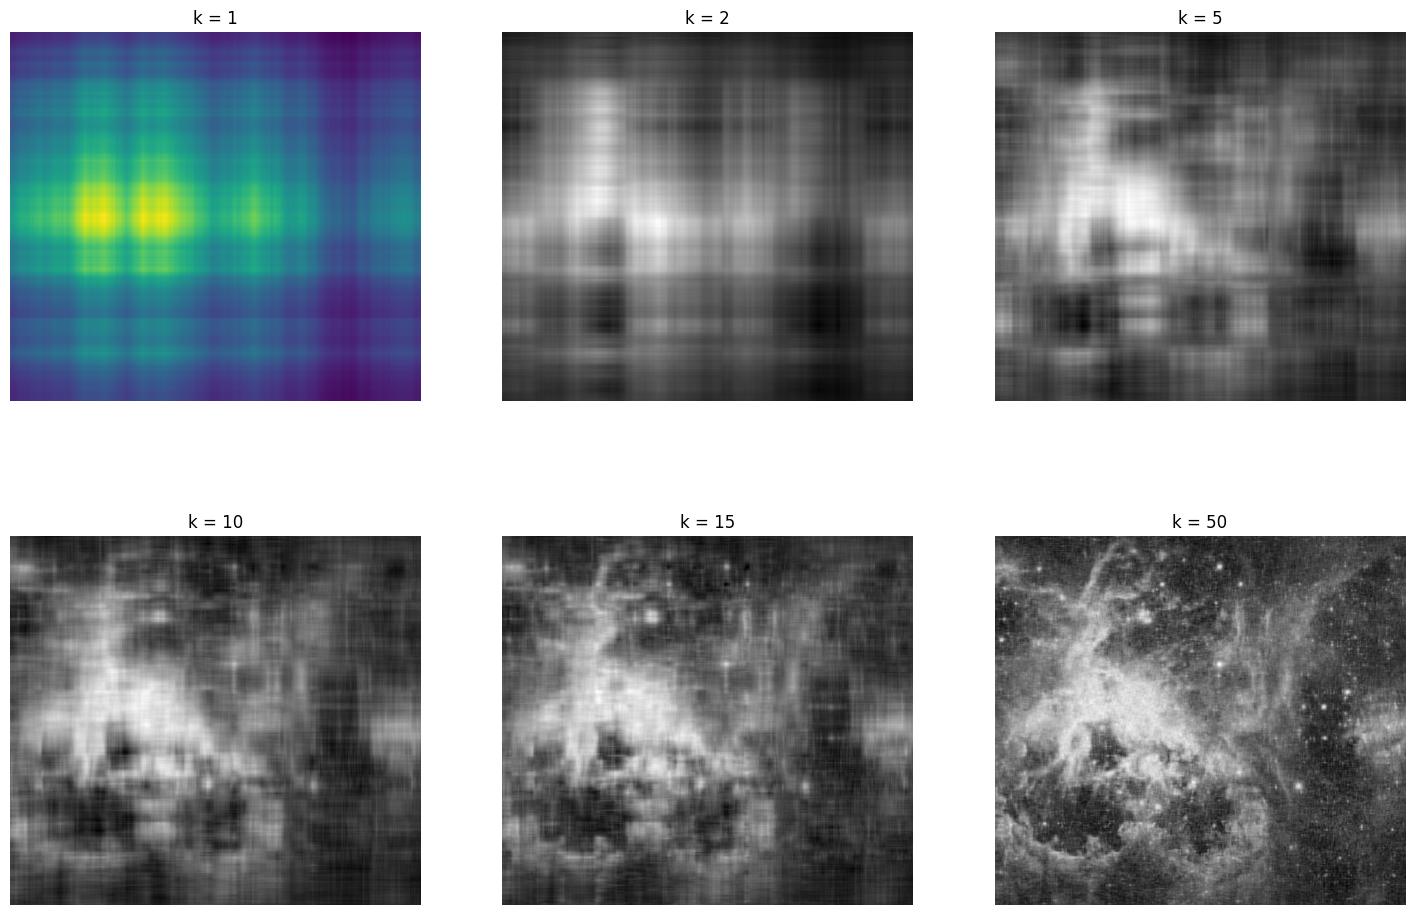

In [23]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
  axs[i].imshow(X_k)
  axs[i].set_title('k = %d' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

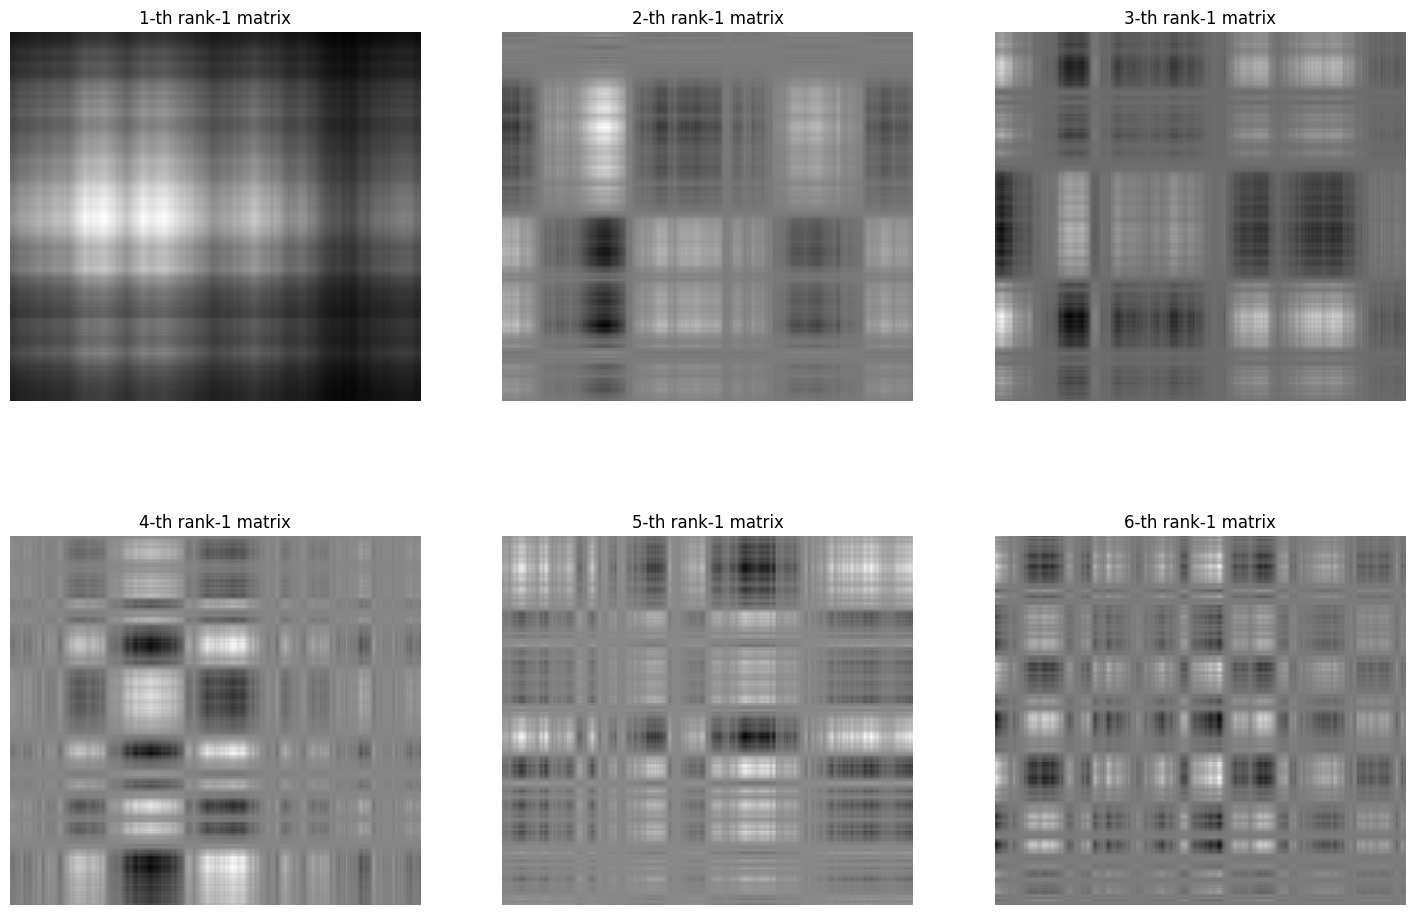

In [25]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1,2,3,4,5,6]
for i in range(len(idxs)):
  k = idxs[i]
  ukvk = np.outer(U[:,k - 1], VT[k - 1,:])      #-1 because we count from 0
  axs[i].imshow(ukvk)
  axs[i].set_title('%d-th rank-1 matrix' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [33]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k)
  Z = X @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ X
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

Set $k=100$ and compute the randomized SVD of the picture used above.

In [34]:
k = 100
U_k, s_k, VT_k = randomized_SVD(A, k)

U_k.shape, s_k.shape, VT_k.shape

((567, 100), (100,), (100, 630))

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

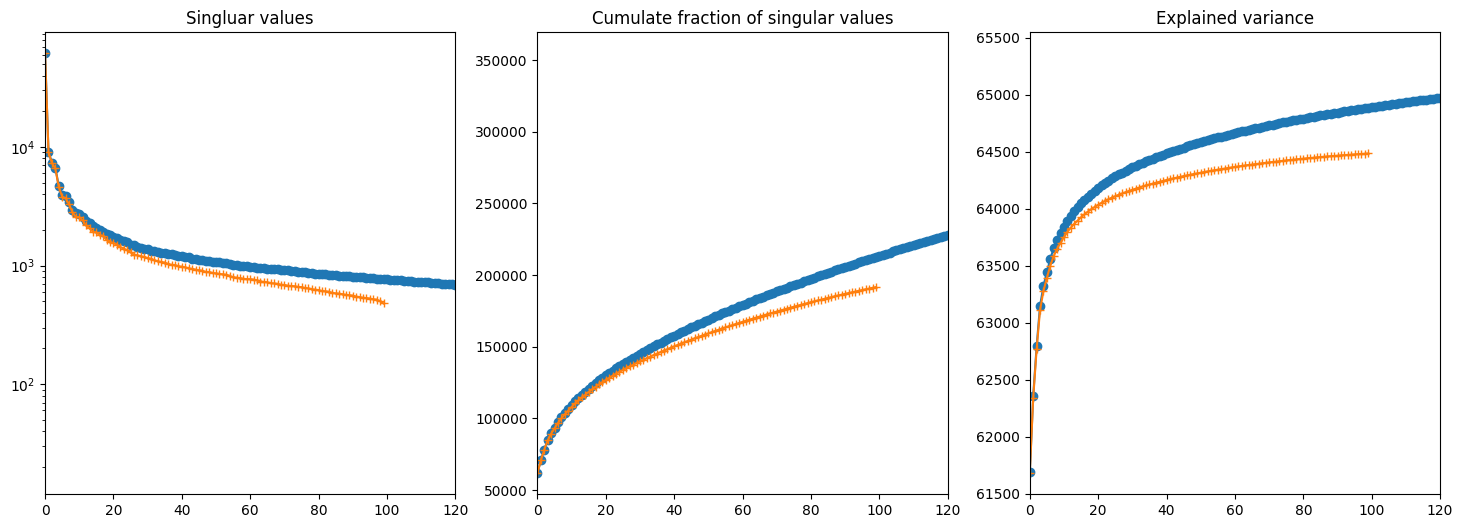

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s  , 'o-')
axes[0].semilogy(s_k, '+-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s  ), 'o-')
axes[1].plot(np.cumsum(s_k), '+-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s  **2)), 'o-')
axes[2].plot(np.sqrt(np.cumsum(s_k**2)), '+-')
axes[2].set_title('Explained variance')

for ax in axes:
  ax.set_xlim([0, int(k*1.2)])

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

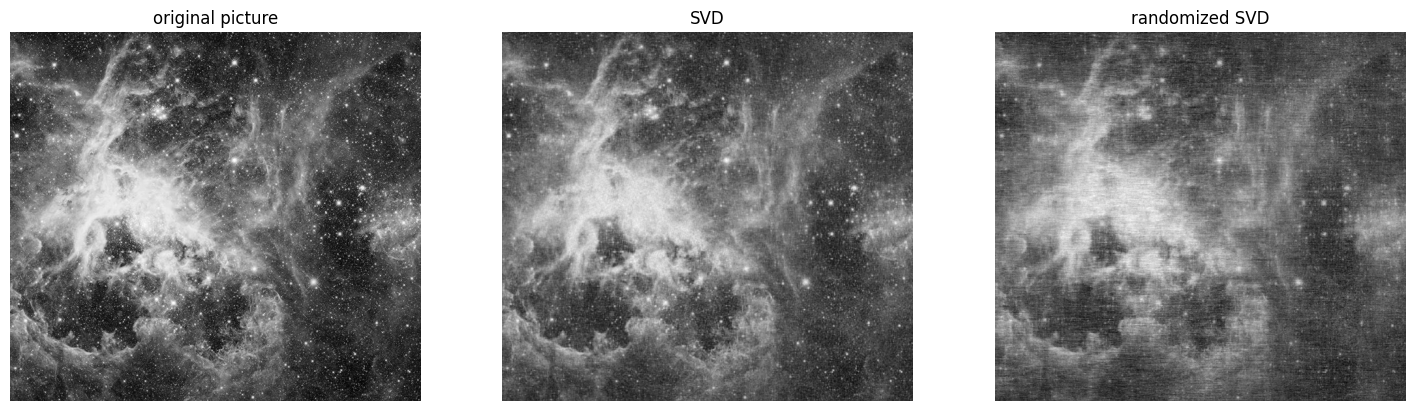

In [36]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18,6))

axs[0].imshow(X)
axs[1].imshow(U[:,:k] @ np.diag(s[:k]) @ VT[:k,:])
axs[2].imshow(U_k @ np.diag(s_k) @ VT_k)

axs[0].set_title('original picture')
axs[1].set_title('SVD')
axs[2].set_title('randomized SVD')

for ax in axs:
  ax.axis('off')
  plt.set_cmap('gray')